# Methodology / Documentation of all the Steps

## Data Gathering:-  
In this step downloaded the data from github Programmatically and converted it into a Pandas dataframe
## Exploratory Data Analysis:- 
In this step performed initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. Created different histograms, boxplot and some other visualizations to better understand the data
## Feature Engineering:-
In this step used the domain knowledge of the data to create features that can improve the performance of the machine learning models. Created new feautres using the below columns. 

1) transactionDateTime:- # Calculate Total no of transaction occured on that CARD in last 1 hr and 24 hr (1 day)

2) accountOpenDate:- # Calculate how old is the account (Number of days passed siince account opened)

3) dateOfLastAddressChange:- # Calculate days past since adress changed (Number of days)

4) merchantCountryCode and acqCountry:- # Flag column which tells for each transaction merchantCountryCode and acqCountry values were same or not

5) cardCVV and enteredCVV:- # Flag column which tells for each transaction cardCVV and enteredCVV values were same or not.

> In this step I also worked on<br><br>
1.Imputation <br>
2.Handling Outliers <br>
3.Binning <br>
4.Log Transform <br>
5.One-Hot Encoding<br>
6.Grouping Operations <br>
7.Feature Split <br>
8.Scaling <br>
9.Extracting Date<br>

## Model Building:- 
For this case study purpose I have tried two different models. Some of the main steps involved in the entire modeling process are listed below.
1. Random Forest Classifier
2. Xgboost Classifier

### On a high level I have done 5 main things:- 

(A) One Hot Encoding to Handle categorical Variables 

(B) Split Data into Training and Test set

(c) Over sampling(SMOTE) TRAINING data to handle the imbalance between the classes. 

(D) Feature Selection using mutual_info_classif 

(E) Parameter Tuning using GridSearch etc. 

## Model Evaluation Matrics:-
In this step I analyzed the performance of the model by looking at different model evaluation matrics like
Classification Accuracy, Confusion Matrix, Classification Report etc. 

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import urllib, zipfile, tempfile, shutil, os,datetime

from sklearn.metrics import mean_squared_error, r2_score, f1_score,confusion_matrix, classification_report, accuracy_score


from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

# Question 1: Load

Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found https://github.com/rk/ml

Describe the structure of the data. Number of records and fields in each record?

Provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate

#### Download Data PROGRAMMATICALLY from gitbub and convert it into a dataframe

In [2]:
url = 'https://raw.githubusercontent.com/data/deleted/for/privacy/transactions.zip'
zipdir = tempfile.gettempdir()
_ = urllib.request.urlretrieve(url, os.path.join(zipdir, 'transactions.zip'))
test = zipfile.ZipFile(os.path.join(zipdir, 'transactions.zip'))
test.extractall(zipdir)
test.close()
df  = pd.read_json(os.path.join(zipdir, 'transactions.txt'), lines=True)
df = pd.DataFrame(df)
# shutil.rmtree(zipdir)  # Need to change temp dir default, currently it is /var should be /tmp

In [3]:
df.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000,0.00,04/2020,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,05,,,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000,111.33,06/2023,733493772,2014-08-03,,492,False,False,rideshare,,US,Uber,,,01,09,,,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000,136.08,12/2027,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,05,,,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000,323.48,09/2029,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,02,,,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000,550.82,10/2024,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,02,,,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION


#### Number of records - Check the shape of Data 

In [4]:
print(f'\nTotal Rows = {df.shape[0]}\n\nTotal Columns = {df.shape[1]}')


Total Rows = 641914

Total Columns = 29


#### Structure of the data - Check Datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
accountNumber               641914 non-null int64
accountOpenDate             641914 non-null object
acqCountry                  641914 non-null object
availableMoney              641914 non-null float64
cardCVV                     641914 non-null int64
cardLast4Digits             641914 non-null int64
cardPresent                 641914 non-null bool
creditLimit                 641914 non-null int64
currentBalance              641914 non-null float64
currentExpDate              641914 non-null object
customerId                  641914 non-null int64
dateOfLastAddressChange     641914 non-null object
echoBuffer                  641914 non-null object
enteredCVV                  641914 non-null int64
expirationDateKeyInMatch    641914 non-null bool
isFraud                     641914 non-null bool
merchantCategoryCode        641914 non-null object
merchantCity                6419

#### Descriptive Statistics for all the columns - 

In [6]:
display(df.describe(include = [np.number]))

display(df.describe(include=['O']))

display(df.describe(include=['bool']))

,accountNumber,availableMoney,cardCVV,cardLast4Digits,creditLimit,currentBalance,customerId,enteredCVV,transactionAmount
count,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,6.419140e+05,641914.000000,641914.000000
mean,5.547701e+08,6652.828573,557.199927,4886.184043,10697.210608,4044.382035,5.547701e+08,556.775160,135.162497
std,2.546884e+08,9227.132275,257.326204,2859.053679,11460.359133,5945.510224,2.546884e+08,257.402639,147.053302
min,1.005471e+08,-1244.930000,100.000000,0.000000,250.000000,0.000000,1.005471e+08,1.000000,0.000000
25%,3.223192e+08,1114.970000,334.000000,2364.000000,5000.000000,502.442500,3.223192e+08,333.000000,32.320000
50%,5.438879e+08,3578.165000,581.000000,4873.000000,7500.000000,2151.860000,5.438879e+08,580.000000,85.800000
75%,7.862277e+08,8169.185000,762.000000,7267.000000,15000.000000,5005.890000,7.862277e+08,761.000000,189.030000
max,9.999853e+08,50000.000000,998.000000,9998.000000,50000.000000,47496.500000,9.999853e+08,998.000000,1825.250000


,accountOpenDate,acqCountry,currentExpDate,dateOfLastAddressChange,echoBuffer,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionDateTime,transactionType
count,641914,641914,641914,641914,641914,641914,641914,641914,641914,641914,641914,641914,641914,641914,641914,641914,641914
unique,1826,5,165,2186,1,19,1,5,2493,1,1,4,6,1,1,635472,4
top,2015-12-11,US,05/2026,2016-07-20,,online_retail,,US,Lyft,,,01,05,,,2016-04-04T20:22:12,PURCHASE
freq,10137,632303,4209,3948,641914,161469,641914,635577,25311,641914,641914,514144,255615,641914,641914,3,608685


,cardPresent,expirationDateKeyInMatch,isFraud
count,641914,641914,641914
unique,2,2,2
top,False,False,False
freq,340453,640945,630612


# Question 2: Plot

##### A). Plot a histogram of the processed amounts of each transaction, the transactionAmount column

#### Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

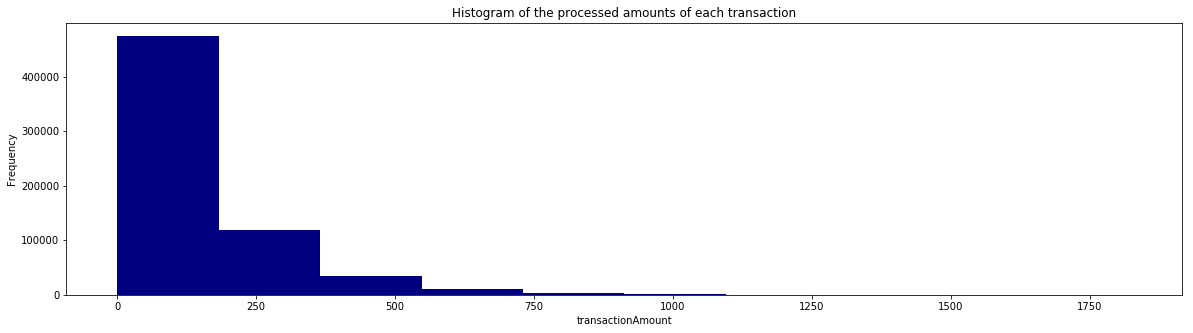

In [7]:
df.transactionAmount.plot.hist(title='Histogram of the processed amounts of each transaction',
                               colormap='jet',
                               figsize=(20,5))
plt.xlabel('transactionAmount')

#### Hiistogram for transaction amount broken down by isFraud class

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e95cb4128>,
      dtype=object)

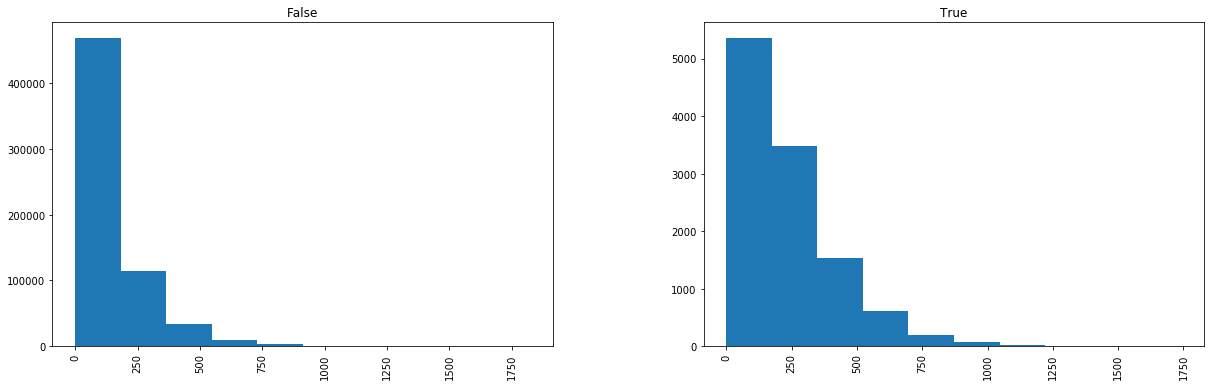

In [11]:
df['transactionAmount'].hist(by=df.isFraud, figsize=(20,6))

##### B). Report any structure you find and any hypotheses you have about that structure

A histogram is right skewed if the peak of the histogram veers to the left. Therefore, the histogram’s tail has a positive skew to the right. So we can conclude that distribution of transactionAmount is Right Skeweed. TransactionAmount skewed to the right is usually a result of a lower boundary in a data set. So if the transactionAmount's lower bounds are extremely low relative to the rest of the data, this will cause the data to skew right.

You can do differrent transformation like log etc. on skewed data to get it closer to Normal Distribution 

In [12]:
# df[['transactionDateTime','transactionAmount']].set_index('transactionDateTime').plot(figsize=(20,6))

# Questiion 3: Data Wrangling - Duplicate Transactions

You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

Can you programmatically identify reversed and multi-swipe transactions?

What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

### Reversed Transaction

In [13]:
cols = ['accountNumber','cardLast4Digits', 'cardCVV','transactionDateTime','transactionAmount', 
        'availableMoney', 'next_availableMoney','transactionType', 'creditLimit', 'merchantName']

df.sort_values(['accountNumber','cardLast4Digits','cardCVV','transactionDateTime'], inplace=True)

In [14]:
# df['next_transactionAmount'] = df.transactionAmount.shift(1)
df['next_availableMoney'] = df.groupby(['accountNumber','cardLast4Digits', 'cardCVV']).availableMoney.shift(-1)

df['calc_Reversed'] = 'NON_REVERSAL'

# df.loc[df.next_availableMoney == df.creditLimit, 'calc_Reversed'] = 'CARD PAYMENT'

df.loc[(df.transactionAmount > 0)  & (df.next_availableMoney == (df.availableMoney + df.transactionAmount)), 
       'calc_Reversed'] = 'REVERSAL'

print(F"\nTotal number of REVERSAL transcation:- {df.loc[df.calc_Reversed == 'REVERSAL'].shape[0]}")
print(F"\nTotal amount of REVERSAL transcation:- {df.loc[df.calc_Reversed == 'REVERSAL'].transactionAmount.sum()}")


Total number of REVERSAL transcation:- 8630

Total amount of REVERSAL transcation:- 1167576.9000000001


###  Multi-Swipe Transaction

In [15]:
df['calc_mul_swipe'] = 'Not_multiSwipe'

df['prev_transactionAmount'] = df.groupby(['accountNumber','cardLast4Digits', 'cardCVV']).transactionAmount.shift(1)
df['prev_merchantName'] = df.groupby(['accountNumber','cardLast4Digits', 'cardCVV']).merchantName.shift(1)
df.loc[(df.transactionAmount == df.prev_transactionAmount) & (df.merchantName == df.prev_merchantName), 
       'calc_mul_swipe'] = 'MULTISWIPE'

print(F"\nTotal number of transcation with MULTISWIPE: {df.loc[df.calc_mul_swipe == 'MULTISWIPE'].shape[0]}")
print(F"\nTotal amount of transcation with MULTISWIPE: {df.loc[df.calc_mul_swipe == 'MULTISWIPE'].transactionAmount.sum()}")


Total number of transcation with MULTISWIPE: 19772

Total amount of transcation with MULTISWIPE: 1885166.17


In [16]:
del df['next_availableMoney']
del df['calc_Reversed']
del df['calc_mul_swipe']
del df['prev_transactionAmount']
del df['prev_merchantName']

In [47]:
# df.loc[(df.cardLast4Digits == 9985) & (df.transactionAmount == 370.81)][cols + ['calc_Reversed','calc_mul_swipe']]

In [48]:
# df.loc[df.calc_T2 == 'MULTISWIPE'][cols + ['calc_Reversed','calc_mul_swipe']]

In [49]:
# df.loc[df.cardLast4Digits == 9990][cols + ['calc_Reversed','calc_mul_swipe']]

In [17]:
# df.loc[605610]

In [18]:
# df.loc[(df.cardLast4Digits ==40) & ( df.transactionAmount == 344.69)][cols + ['calc_Reversed','calc_mul_swipe']]

# Question 4

Model

Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

Provide an estimate of performance using an appropriate sample, and show your work.

#### Handle Missing Values
Replacing blank values (white space) with NaN 

In [19]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

#### List of column names to be deleted due to missing values.

In [20]:
[col for col in df if col not in df.dropna(axis=1, how='all')]

['echoBuffer',
 'merchantCity',
 'merchantState',
 'merchantZip',
 'posOnPremises',
 'recurringAuthInd']

#### Delete all columns with missing value

In [21]:
df.dropna(axis=1, how='all',inplace=True)

#### Convert Date columns to Datatime Format

In [33]:
df['transactionDateTime'] = pd.to_datetime(df.transactionDateTime)
df['accountOpenDate'] = pd.to_datetime(df.accountOpenDate)
df['dateOfLastAddressChange'] = pd.to_datetime(df.dateOfLastAddressChange)

In [28]:
# df['month'] = df.transactionDateTime.dt.month
# df['day'] = df.transactionDateTime.dt.day
# df['dow'] = df.transactionDateTime.dt.dayofweek
# df['hour'] = df.transactionDateTime.dt.hour

# sns.pairplot(df, vars=["cardLast4Digits", "transactionAmount","creditLimit","currentBalance"], 
#              hue ='isFraud')

#### Check value counts for column:-  isFraud

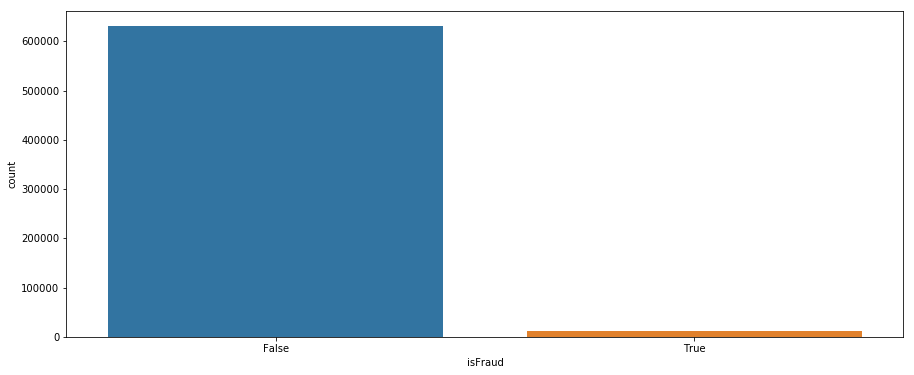

In [29]:
plt.figure(figsize=(15, 6))
sns.countplot(x="isFraud", data=df)

####  Check for Outlier values in transactionAmount

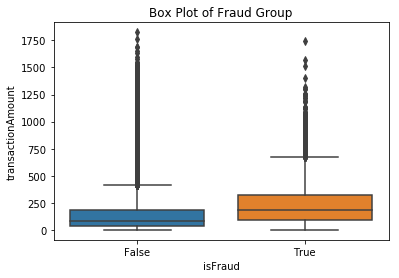

In [30]:
sns.boxplot(data=df, x='isFraud', y='transactionAmount').set_title('Box Plot of Fraud Group')

#### Correlation Matrix

In [31]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,accountNumber,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,expirationDateKeyInMatch,isFraud,transactionAmount
accountNumber,1,-0.0310115,-0.0189749,-0.000439441,0.00248715,-0.05451,-0.0569433,1,-0.0185182,0.00103666,-0.00715734,9.26539e-05
availableMoney,-0.0310115,1,0.00630818,-0.0212659,-0.0178257,0.85644,0.0988951,-0.0310115,0.00644685,-0.00195607,-0.00137897,-0.0117232
cardCVV,-0.0189749,0.00630818,1,-0.0398491,-0.00465694,0.0191692,0.0271598,-0.0189749,0.995397,-0.00222921,-0.00740156,0.00406471
cardLast4Digits,-0.000439441,-0.0212659,-0.0398491,1,0.00281744,-0.0448163,-0.0533827,-0.000439441,-0.039613,0.00189049,-0.00700965,-0.00437341
cardPresent,0.00248715,-0.0178257,-0.00465694,0.00281744,1,-0.0294238,-0.0290517,0.00248715,-0.00444088,0.0413204,-0.0149463,0.0432889
creditLimit,-0.05451,0.85644,0.0191692,-0.0448163,-0.0294238,1,0.598413,-0.05451,0.019299,-0.00290292,0.00335693,0.00240017
currentBalance,-0.0569433,0.0988951,0.0271598,-0.0533827,-0.0290517,0.598413,1,-0.0569433,0.0271949,-0.00255985,0.00861081,0.0228202
customerId,1,-0.0310115,-0.0189749,-0.000439441,0.00248715,-0.05451,-0.0569433,1,-0.0185182,0.00103666,-0.00715734,9.26539e-05
enteredCVV,-0.0185182,0.00644685,0.995397,-0.039613,-0.00444088,0.019299,0.0271949,-0.0185182,1,-0.00278092,-0.00734747,0.00433453
expirationDateKeyInMatch,0.00103666,-0.00195607,-0.00222921,0.00189049,0.0413204,-0.00290292,-0.00255985,0.00103666,-0.00278092,1,-0.00123899,0.000347465


#### Feature Engineering

Created New Features using below columns

1) transactionDateTime:- # Calculate Total no of transaction occured on that CARD in last 1 hr and 24 hr (1 day) 

2) accountOpenDate:- # Calculate how old is the account (Number of days passed siince account opened)

3) dateOfLastAddressChange:- # Calculate days past since adress changed (Number of days)

4) merchantCountryCode and acqCountry:- # Flag column which tells for each transaction merchantCountryCode and acqCountry values were same or not 

5) cardCVV and enteredCVV:- # Flag column which tells for each transaction cardCVV and enteredCVV values were same or not.

In [34]:
df['transaction_day'] = df.transactionDateTime.dt.date
df['transcation_dt_hour'] = df.transactionDateTime.dt.date.astype(str) + '_' + df.transactionDateTime.dt.hour.astype(str)

df['per_hour_transcation_cnt'] = df.groupby(['customerId','accountNumber','cardLast4Digits','transcation_dt_hour'])['acqCountry'].transform('count')
df['per_day_transcation_cnt'] = df.groupby(['customerId','accountNumber','cardLast4Digits','transaction_day'])['acqCountry'].transform('count')

df['account_Age_InDays']  = (datetime.datetime.today()  - df.accountOpenDate).dt.days
df['addressUpdate_Age_InDays']  = (datetime.datetime.today()  - df.dateOfLastAddressChange).dt.days

In [35]:
df['flag_merchant_accq_Countrycode'] = (df.merchantCountryCode == df.acqCountry).astype(int)
df['flag_cardCVV_enteredCVV'] = (df.cardCVV == df.enteredCVV).astype(int)

In [36]:
data = df.copy()

In [37]:
cat_cols =['cardPresent','expirationDateKeyInMatch','merchantCategoryCode','transactionType',
          'posConditionCode','posEntryMode']

drop_cols = ['customerId','transactionDateTime','accountOpenDate','dateOfLastAddressChange','acqCountry',
             'merchantCountryCode','merchantName','transcation_dt_hour','currentExpDate','currentExpDate',
             'transaction_day','cardCVV','enteredCVV']

target_col = 'isFraud'

#### Handling Categorical varibales:- One Hot Encoding

In [38]:
data = pd.get_dummies(data, columns=cat_cols)

#### Drop Unwanted columns

In [39]:
data.drop(drop_cols, axis=1, inplace=True)

In [40]:
# Drop all rows with NAN (posConditionCode and posEntryMode)
data = data[data.notnull().all(axis=1)]

In [41]:
Y = data[target_col].astype('int')
del data[target_col]
X = data

#### Split Data into Train and Test

In [86]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print(F"\nTRAINING DATA SHAPE{X_train.shape} {Y_train.shape} \n\nTEST DATA SHAPE{X_test.shape} {Y_test.shape}")


TRAINING DATA SHAPE(449339, 46) (449339,) 

TEST DATA SHAPE(192575, 46) (192575,)


### Over Sample the Training Data to handle IMBALANCE

In [60]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# SMOTE oversampling
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_sample(X_train, Y_train)

# using Counter to display results of  oversampling
print(sorted(Counter(y_resampled).items()))

[(0, 441450), (1, 441450)]


In [95]:
print(F"\nAFTER RESAMPLING THE DATA:-\n\nTRAINING DATA SHAPE{X_resampled.shape} {y_resampled.shape} \n\nTEST DATA SHAPE{X_test.shape} {Y_test.shape}")


AFTER RESAMPLING THE DATA:-

TRAINING DATA SHAPE(882900, 46) (882900,) 

TEST DATA SHAPE(192575, 46) (192575,)


### Feature Selection - Top 15

In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=15)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

X_train_fs, X_test_fs = select_features(X_resampled, y_resampled, X_test)

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'auto',
                             n_estimators=10, 
                             oob_score = False, 
                             class_weight = {0: 0.002271, 1:0.997729}) 

rfc.fit(X_train_fs,y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.002271, 1: 0.997729},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

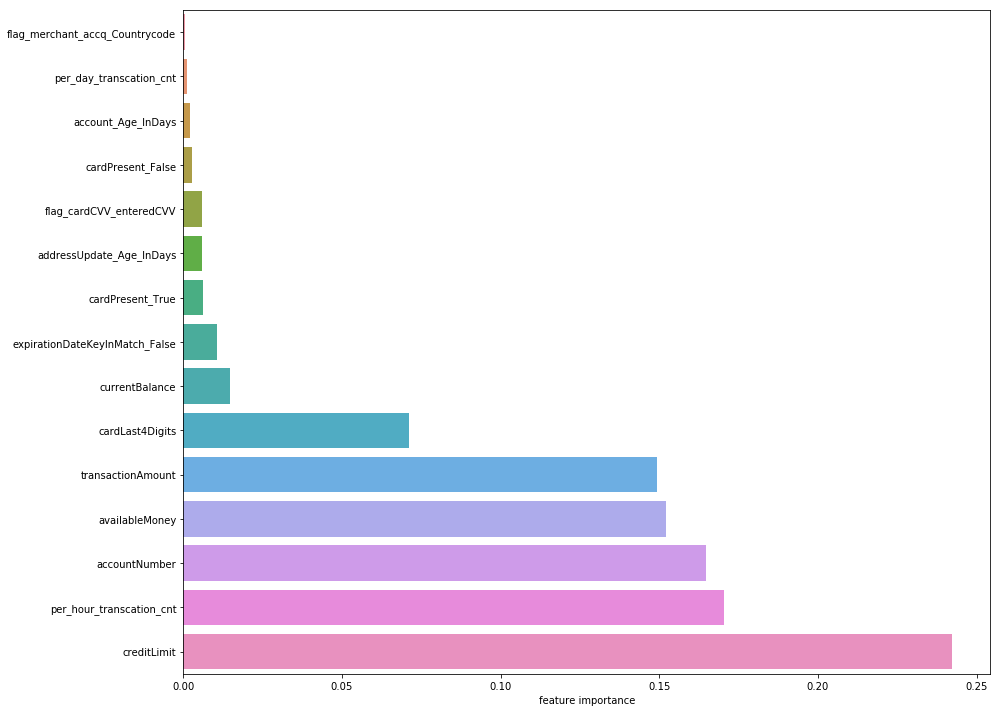

In [99]:
#  Plot Feature Importance  
ranking = np.argsort(rfc.feature_importances_)
f, ax = plt.subplots(figsize=(14, 10))
sns.barplot(x=rfc.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

#### Model Score

In [102]:
print(f"Score on Training Data:- {rfc.score(X_train_fs, y_resampled)}")

print(f"Score on Test Data:- {rfc.score(X_test_fs, Y_test)}")

Score on Training Data:- 0.9953063767131045
Score on Test Data:- 0.9347994287939764


#### Model Evaluation Matrics

1. Classification Report
2. Confusion Matrix

In [103]:
Y_pred = rfc.predict(X_test_fs)

In [104]:
print(f"Classification Report:- \n\n{classification_report(Y_test, Y_pred, digits=2)}")

Classification Report:- 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    189162
           1       0.07      0.21      0.10      3413

    accuracy                           0.93    192575
   macro avg       0.53      0.58      0.53    192575
weighted avg       0.97      0.93      0.95    192575



In [105]:
print(f"Confusion Matrix :- \n\n {confusion_matrix(Y_test, Y_pred)}")

Confusion Matrix :- 

 [[179319   9843]
 [  2713    700]]


#### Hyper Parameter Tuning

In [107]:
from sklearn.model_selection import learning_curve,GridSearchCV

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'auto',
                             n_estimators=10, 
                             oob_score = False, 
                             class_weight = {0: 0.002271, 1:0.997729}) 

param_grid = { 
    'n_estimators': [20, 50,100],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train_fs,y_resampled)

print(CV_rfc.best_params_)

{'max_features': 'log2', 'n_estimators': 100}


In [108]:
print(f"Score on Training Data:- {CV_rfc.score(X_train_fs, y_resampled)}")
print(f"Score on Test Data:- {CV_rfc.score(X_test_fs, Y_test)}")

Score on Training Data:- 0.9998584211122438
Score on Test Data:- 0.9334960405036998


In [109]:
# evaluate the model
Y_pred = CV_rfc.predict(X_test_fs)

# evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 93.35


In [110]:
print(f"Classification Report:- \n\n{classification_report(Y_test, Y_pred, digits=2)}")

Classification Report:- 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    189162
           1       0.07      0.21      0.10      3413

    accuracy                           0.93    192575
   macro avg       0.53      0.58      0.53    192575
weighted avg       0.97      0.93      0.95    192575



In [111]:
print(f"Confusion Matrix :- \n\n {confusion_matrix(Y_test, Y_pred)}")

Confusion Matrix :- 

 [[179046  10116]
 [  2691    722]]


### Model 2:- XgboostClassiifier

In [121]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# fit model no training data
model_xgb = XGBClassifier()

model_xgb.fit(X_train_fs, y_resampled)

# make predictions for test data
y_pred = model_xgb.predict(X_test_fs)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.47%


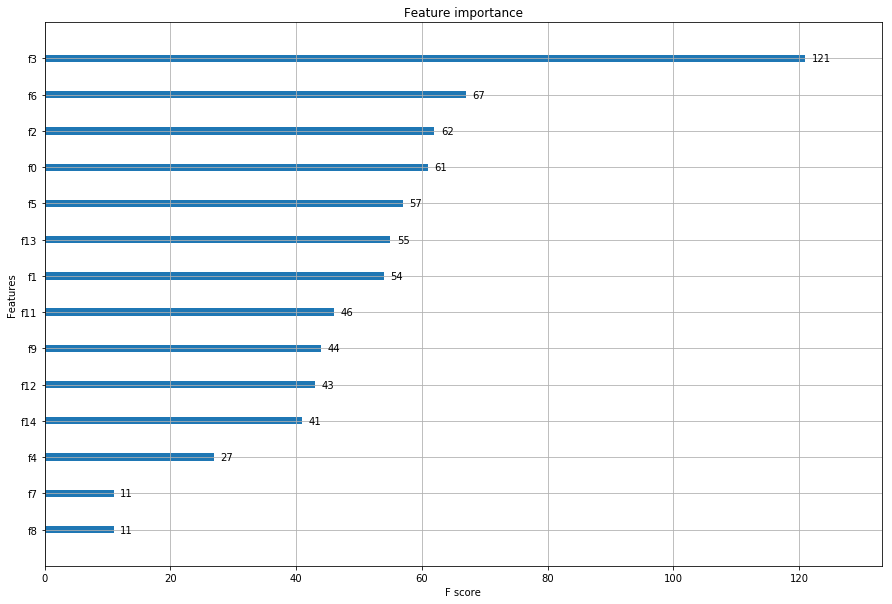

In [122]:
from xgboost import plot_importance

ax = plot_importance(model_xgb)
fig = ax.figure
fig.set_size_inches(15, 10)

In [123]:
cm = pd.DataFrame(confusion_matrix(Y_test, predictions))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes   Total
Actual No         151315          37847  189162
Actual Yes          1695           1718    3413
Total             153010          39565  192575


In [124]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88    189162
           1       0.04      0.50      0.08      3413

    accuracy                           0.79    192575
   macro avg       0.52      0.65      0.48    192575
weighted avg       0.97      0.79      0.87    192575



#### Feature Selection with XGBoost Feature Importance Scores

In [115]:
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# fit model on all Over SAMPLED training data
model = XGBClassifier()
model.fit(X_resampled, y_resampled)

# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)

for thresh in thresholds:
    if thresh==0:
        pass
    else:
        # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_resampled)
        # train model
        selection_model = XGBClassifier()
        selection_model.fit(select_X_train, y_resampled)
        # eval model
        select_X_test = selection.transform(X_test)
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(Y_test, predictions)
        print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 93.61%
Thresh=0.000, n=35, Accuracy: 93.61%
Thresh=0.000, n=34, Accuracy: 93.61%
Thresh=0.001, n=33, Accuracy: 93.61%
Thresh=0.001, n=32, Accuracy: 93.60%
Thresh=0.002, n=31, Accuracy: 93.56%
Thresh=0.002, n=30, Accuracy: 93.46%
Thresh=0.002, n=29, Accuracy: 93.37%
Thresh=0.002, n=28, Accuracy: 93.23%
Thresh=0.003, n=27, Accuracy: 93.52%
Thresh=0.004, n=26, Accuracy: 93.77%
Thresh=0.007, n=25, Accuracy: 93.77%
Thresh=0.007, n=24, Accuracy: 93.75%
Thresh=0.008, n=23, Accuracy: 94.10%
Thresh=0.008, n=22, Accuracy: 94.10%
Thresh=0.009, n=21, Accuracy: 93.94%
Thresh=0.010, n=20, Accuracy: 93.75%
Thresh=0.012, n=19, Accuracy: 94.03%
Thresh=0.012, n=18, Accuracy: 93.77%
Thresh=0.012, n=17, Accuracy: 93.85%
Thresh=0.015, n=16, Accuracy: 93.84%
Thresh=0.015, n=15, Accuracy: 93.91%
Thresh=0.015, n=14, Accuracy: 93.90%
Thresh=0.018, n=13, Accuracy: 93.67%
Thresh=0.018, n=12, Accuracy: 93.63%
Thresh=0.030, n=11, Accuracy: 93.50%
Thresh=0.034, n=10, Accuracy: 92.83%
Thresh=0.038, n=9, Ac

##### We can see that the performance of the model generally decreases with the number of selected features. On this problem there is a trade-off of features to test set accuracy and we could decide to take a less complex model (fewer attributes such as n=8) and accept a modest decrease in estimated accuracy from 93.61% down to 90.21%.